In [1]:
"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

"""
Load own functions/packages
"""



'\nLoad own functions/packages\n'

# Toymodel for Hedging FX Risk

## Hedge Portfolio Return

__Global Currency Hedging__ Campbell

The gross portfolio return for an unhedge exposure is 

$$
R_{t+1}^p =  \mathbf{R}_{t+1}^\top \mathbf{w}_t \frac{\mathbf{S}_{t+1}}{\mathbf{S}_t}
$$

where $\mathbf{w}_t = \text{diag} (w_{1,t},...w_{n,t})$ is $n \times n$ diagonal matrix of weights on risky assets, $\mathbf{R}_{t+1}$ is the $(n \times 1)$ vector of gross nominal returns in local currency and $S_{t+1}$ is a vector of spot exhange rates. The fraction indicates element-by-element division. The weighs are assumed to sum to one. 



The log-returns on the portfolio can be approximated by

$$
\mathbf{r}_t^p = \mathbf{w}^\top \mathbf{r}_t + \mathbf{m}^\top \mathbf{r}^s_t  + \mathbf{h}^\top \text{diag}(M) \mathbf{r}_t^h
$$

where 

- $\mathbf{r}_t^p$ is the portfolio return
- 

## The optimal hedge ratio

$$
P_t^U  = P_t S_t
$$

$$
P_t^U/P_{t-1}^U - 1  = \frac{P_t S_t}{P_{t-1} S_{t-1}} - 1 = \frac{P_t S_t - P_{t-1} S_{t-1}}{P_{t-1} S_{t-1}}
$$

In [7]:
0.5*1.5 + 0.5*2.0

1.75

In [11]:
portfolio_info = {'USD_EQ': {'pf_weight':0.5, 'fx_domestic':'USD'},
                  'USD_FI': {'pf_weight':0.5, 'fx_domestic':'USD'}}

In [208]:
portfolio_weights = np.array([0.5, 0.5])
expected_asset_return = np.array([0.01, 0.05])
expected_fx_return = np.array([0.0])
expected_return = np.r_[expected_asset_return, expected_fx_return]

asset_vols = np.array([0.08, 0.18])
fx_vols = np.array([0.1])

vols = np.r_[asset_vols, fx_vols]

corr = np.array([[1.0, -0.2, -0.6],
                 [-0.2, 1.0, -0.5],
                 [-0.6, -0.5, 1.0]])

cov = np.diag(vols) @ corr @ np.diag(vols)
cov

array([[ 0.0064 , -0.00288, -0.0048 ],
       [-0.00288,  0.0324 , -0.009  ],
       [-0.0048 , -0.009  ,  0.01   ]])

In [209]:
np.outer(vols, vols) * corr

array([[ 0.0064 , -0.00288, -0.0048 ],
       [-0.00288,  0.0324 , -0.009  ],
       [-0.0048 , -0.009  ,  0.01   ]])

In [210]:
random_draws = np.random.multivariate_normal(mean=expected_return, cov=cov, size=49999)

In [184]:
random_draws.shape

(49999, 3)

In [211]:
asset_gross_returns = np.exp(random_draws[:, :2]) - 1
fx_tot_returns = np.exp(random_draws[:, 2])
fx_gross_returns = np.exp(random_draws[:, 2]) - 1

In [212]:
hedge_ratios = np.arange(0.0, 1.1, 0.1)

In [213]:
(asset_gross_returns @ portfolio_weights).shape

(49999,)

In [214]:
fx_tot_returns

array([0.98782651, 0.92755175, 0.94420243, ..., 1.11028319, 1.00078261,
       1.13613403])

In [215]:
hedge_ratio = 1.0
carry = -0.0

unhedged_gross_return = (1 + asset_gross_returns) @ portfolio_weights * fx_tot_returns - 1

hedged_gross_return = (1+asset_gross_returns) @ portfolio_weights * fx_tot_returns - hedge_ratio * fx_tot_returns + hedge_ratio * np.exp(carry)  - 1.0

<AxesSubplot:ylabel='Density'>

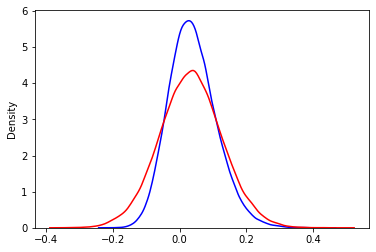

In [216]:
sns.kdeplot(unhedged_gross_return, color="blue")
sns.kdeplot(hedged_gross_return, color="red")

In [217]:
list_std = list()
list_var = list()
list_exp_ret = list()

for h in hedge_ratios: 
    
    hedged_gross_return = (1+asset_gross_returns) @ portfolio_weights * fx_tot_returns - h * fx_tot_returns + h * np.exp(carry)  - 1.0
    
    list_exp_ret.append(np.average(hedged_gross_return))
    list_std.append(np.std(hedged_gross_return))
    list_var.append(np.percentile(hedged_gross_return, 5))
    

Text(0, 0.5, 'Standard deviation')

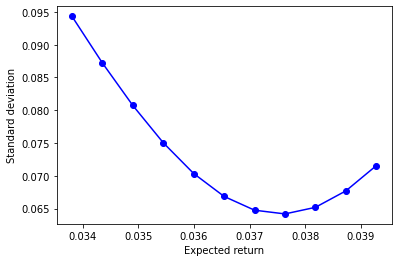

In [218]:
fig, ax = plt.subplots()

plt.plot(list_exp_ret, list_std, color="blue", linestyle="-", marker="o") 
plt.xlabel('Expected return')
plt.ylabel('Standard deviation')

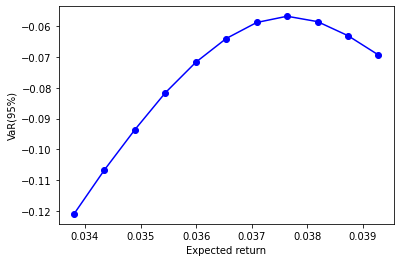

In [219]:
fig, ax = plt.subplots()

plt.plot(list_exp_ret, list_var, color="blue", linestyle="-", marker="o") 
plt.xlabel('Expected return')
plt.ylabel('VaR(95%)');

## References

https://www-nber-org.esc-web.lib.cbs.dk:8443/system/files/working_papers/w13088/w13088.pdf


https://pubsonline-informs-org.esc-web.lib.cbs.dk:8443/doi/pdf/10.1287/mnsc.2020.3872

# Appendix

## Hedged Portfolio Return

The gross portfolio return for an unhedged exposure is 

$$
R_{t+1}^{uh} =  \mathbf{R}_{t+1}^\top \mathbf{w}_t \frac{\mathbf{S}_{t+1}}{\mathbf{S}_t}
$$

where $\mathbf{w}_t = \text{diag} (w_{1,t},...w_{n,t})$ is $n \times n$ diagonal matrix of weights on risky assets, $\mathbf{R}_{t+1}$ is the $(n \times 1)$ vector of gross nominal returns in local currency and $S_{t+1}$ is a vector of spot exhange rates. The fraction indicates element-by-element division. The weighs are assumed to sum to one. 

If the investor hedges with forward exchange rate contracts, the hedged portfolio return can be written as 

$$
R_{t+1}^{h} =  \mathbf{R}_{t+1}^\top \mathbf{w}_t \frac{\mathbf{S}_{t+1}}{\mathbf{S}_t}
+ \mathbf{h}^\top \frac{\mathbf{F}_t - \mathbf{S}_{t+1}}{\mathbf{S}_t} = \mathbf{R}_{t+1}^\top \mathbf{w}_t \frac{\mathbf{S}_{t+1}}{\mathbf{S}_t}
+ \mathbf{h}^\top \frac{\mathbf{F_t}}{\mathbf{S}_t} - \mathbf{h}^\top \frac{\mathbf{S}_{t+1}}{\mathbf{S}_t} 
$$

where $\mathbf{h}$ is a vector of hedge ratios. 

### Log portfolio returns over short time intervals

We assume that the assets and the exchange rates follow geometric Browninan motions

$$
\begin{align}
\frac{dP_t}{P_t} &= \mu_p + \sigma_p dZ_t^p \\
\frac{dS_t}{S_t} &= \mu_s + \sigma_s dZ_t^s
\end{align}
$$

Using Ito's lemma, we obtain

$$
\begin{align}
d\log P_t &= \frac{dP_t}{P_t} - \frac{1}{2}\sigma_p^2 dt \\
d\log S_t &= \frac{dS_t}{S_t} - \frac{1}{2}\sigma_s^2 dt 
\end{align}
$$

It is possible to show that 

$$
\begin{align}
\frac{dP_tS_t}{P_t S_t} &= \frac{dP_t}{P_t} + \frac{dS_t}{S_t} + \sigma_p \sigma_s \rho_{s,p} dt \\
&= d\log P_t + d \log S_t + \frac{1}{2}\text{Var} (d\log P + d \log S) dt
\end{align}
$$

The log-return of the portfolio is given by

$$
d \log V_t = \frac{dV_t}{V_t} - \frac{1}{2} \left( \frac{dV_t}{V_t}\right)^2
$$

The first term is given by

$$
\begin{align}
\frac{dV_t}{V_t} &= \mathbf{1}^\top\mathbf{w} (\mathbf{r}_{t+1} + \mathbf{s}_{t+1}) - \mathbf{h}_t^\top (\mathbf{s_{t+1}} - \mathbf{f_t})  \\ 
& + \frac{1}{2} \left[ \mathbf{1}^\top\mathbf{w} \text{diag} (\text{Var} (\mathbf{r}_{t+1} + \mathbf{s}_{t+1})) -  \mathbf{h}_t^\top \text{diag} (\text{Var}(\mathbf{s_{t+1}})) \right]dt
\end{align}
$$

The second term is given by

$$
\begin{align}
\left( \frac{dV_t}{V_t}\right)^2 &= \text{Var} \left[\mathbf{1}^\top\mathbf{w} (\mathbf{r}_{t+1} + \mathbf{s}_{t+1}) - \mathbf{h}_t^\top (\mathbf{s_{t+1}} - \mathbf{f_t})\right] dt + o(dt)  \\
&=\text{Var} \left[\mathbf{1}^\top\mathbf{w} (\mathbf{r}_{t+1} + \mathbf{s}_{t+1}) - \mathbf{h}_t^\top \mathbf{s_{t+1}}\right] dt + o(dt)
\end{align}
$$

Combining the expressions yields, 

$$
\begin{align}
d \log V_t &= \mathbf{1}^\top\mathbf{w} (\mathbf{r}_{t+1} + \mathbf{s}_{t+1}) - \mathbf{h}_t^\top (\mathbf{s_{t+1}} - \mathbf{f_t})  \\ 
& + \frac{1}{2} \left[ \mathbf{1}^\top\mathbf{w} \text{diag} (\text{Var} (\mathbf{r}_{t+1} + \mathbf{s}_{t+1})) -  \mathbf{h}_t^\top \text{diag} (\text{Var}(\mathbf{s_{t+1}})) \right]dt \\
&- \frac{1}{2}\text{Var} \left[\mathbf{1}^\top\mathbf{w} (\mathbf{r}_{t+1} + \mathbf{s}_{t+1}) - \mathbf{h}_t^\top \mathbf{s_{t+1}}\right] dt
\end{align}
$$
